In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(1, "../..")
from itertools import product
from prototype_nn import Splitting, predictions, tensor_flatten
import matplotlib.pyplot as plt
import prototype
import torch
%run ../utilities.ipynb

## Training : Simulations

In [2]:
training = pd.DataFrame(data = pd.read_csv("../../data/train/spiking_neurons.csv"))
training.head()

,time,initial_u,initial_v,u,v
0,0.0,-0.2,-65,-0.200000,-65.000000
1,0.1,-0.2,-65,-0.225600,-62.580000
2,0.2,-0.2,-65,-0.250181,-60.182414
3,0.3,-0.2,-65,-0.273753,-57.760912
4,0.4,-0.2,-65,-0.296310,-55.268700


In [3]:
len(training)

6006

In [4]:
training["initial_parameters"] = list(zip(training.initial_u, training.initial_v))
training.head()

,time,initial_u,initial_v,u,v,initial_parameters
0,0.0,-0.2,-65,-0.200000,-65.000000,"(-0.2, -65)"
1,0.1,-0.2,-65,-0.225600,-62.580000,"(-0.2, -65)"
2,0.2,-0.2,-65,-0.250181,-60.182414,"(-0.2, -65)"
3,0.3,-0.2,-65,-0.273753,-57.760912,"(-0.2, -65)"
4,0.4,-0.2,-65,-0.296310,-55.268700,"(-0.2, -65)"


In [5]:
initial = training[training["initial_parameters"] == (-0.2,-65)]

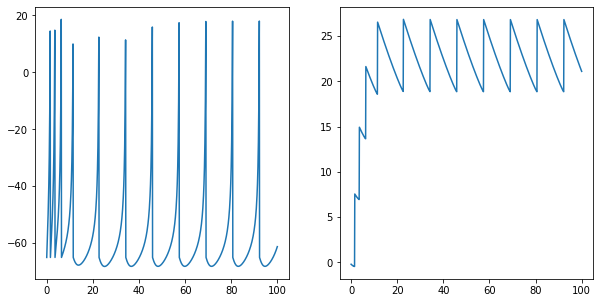

In [6]:
fig, ax = plt.subplots(ncols = 2, figsize=(10,5))
ax[0].plot(initial[["time"]], initial[["v"]])
ax[1].plot(initial[["time"]], initial[["u"]])

In [7]:
kfold = Splitting([0,1,2,4], [3,4], num_epoches = 100, batch_size = 64, lr= 0.0001)

In [8]:
evaluate = kfold.cross_validation_evaluate(training, 5)

------------- Fold 0 -------------
TEST: 0 TRAIN: [1, 2, 3, 4]
Epoch: 0  Train Loss: 173.68824768066406 
Epoch: 1  Train Loss: 6.499135971069336 
Epoch: 2  Train Loss: 4.493480205535889 
Epoch: 3  Train Loss: 6.661275386810303 
Epoch: 4  Train Loss: 1.0020300149917603 
Epoch: 5  Train Loss: 5.2556047439575195 
Epoch: 6  Train Loss: 1.0645432472229004 
Epoch: 7  Train Loss: 0.5237207412719727 
Epoch: 8  Train Loss: 1.1738309860229492 
Epoch: 9  Train Loss: 0.37233227491378784 
Epoch: 10  Train Loss: 2.695399284362793 
Epoch: 11  Train Loss: 0.747241735458374 
Epoch: 12  Train Loss: 0.6008028388023376 
Epoch: 13  Train Loss: 3.398193120956421 
Epoch: 14  Train Loss: 15.897265434265137 
Epoch: 15  Train Loss: 0.3659050166606903 
Epoch: 16  Train Loss: 1.5957366228103638 
Epoch: 17  Train Loss: 0.6107651591300964 
Epoch: 18  Train Loss: 1.1837795972824097 
Epoch: 19  Train Loss: 0.026813626289367676 
Epoch: 20  Train Loss: 0.3814237117767334 
Epoch: 21  Train Loss: 1.2403324842453003 
Epoc

Epoch: 88  Train Loss: 0.3073441684246063 
Epoch: 89  Train Loss: 1.2386106252670288 
Epoch: 90  Train Loss: 0.25808092951774597 
Epoch: 91  Train Loss: 0.0678236111998558 
Epoch: 92  Train Loss: 0.23760950565338135 
Epoch: 93  Train Loss: 0.10544995963573456 
Epoch: 94  Train Loss: 0.18331560492515564 
Epoch: 95  Train Loss: 0.08144761621952057 
Epoch: 96  Train Loss: 0.44439902901649475 
Epoch: 97  Train Loss: 0.4133804440498352 
Epoch: 98  Train Loss: 1.1442795991897583 
Epoch: 99  Train Loss: 0.1938883513212204 
------------- Fold 2 -------------
TEST: 2 TRAIN: [0, 1, 3, 4]
Epoch: 0  Train Loss: 43.10420608520508 
Epoch: 1  Train Loss: 17.349395751953125 
Epoch: 2  Train Loss: 4.175942420959473 
Epoch: 3  Train Loss: 1.993268370628357 
Epoch: 4  Train Loss: 2.5125181674957275 
Epoch: 5  Train Loss: 21.06855583190918 
Epoch: 6  Train Loss: 2.0213608741760254 
Epoch: 7  Train Loss: 0.44299617409706116 
Epoch: 8  Train Loss: 0.19538374245166779 
Epoch: 9  Train Loss: 25.62877273559570

Epoch: 76  Train Loss: 0.13078223168849945 
Epoch: 77  Train Loss: 0.36194494366645813 
Epoch: 78  Train Loss: 0.3705590069293976 
Epoch: 79  Train Loss: 0.22792141139507294 
Epoch: 80  Train Loss: 0.15502092242240906 
Epoch: 81  Train Loss: 2.587815761566162 
Epoch: 82  Train Loss: 0.5423643589019775 
Epoch: 83  Train Loss: 0.19617024064064026 
Epoch: 84  Train Loss: 0.8026588559150696 
Epoch: 85  Train Loss: 0.20565636456012726 
Epoch: 86  Train Loss: 0.3468989431858063 
Epoch: 87  Train Loss: 0.6748003959655762 
Epoch: 88  Train Loss: 0.2040286511182785 
Epoch: 89  Train Loss: 0.23337268829345703 
Epoch: 90  Train Loss: 0.1468682438135147 
Epoch: 91  Train Loss: 0.41178998351097107 
Epoch: 92  Train Loss: 0.7839149236679077 
Epoch: 93  Train Loss: 0.5422154664993286 
Epoch: 94  Train Loss: 0.9600973129272461 
Epoch: 95  Train Loss: 0.10261698067188263 
Epoch: 96  Train Loss: 0.22514159977436066 
Epoch: 97  Train Loss: 0.2449030578136444 
Epoch: 98  Train Loss: 0.11021751165390015 
E

In [9]:
evaluate

[tensor(0.4378, grad_fn=<MseLossBackward>),
 tensor(0.6366, grad_fn=<MseLossBackward>),
 tensor(0.4739, grad_fn=<MseLossBackward>),
 tensor(0.5296, grad_fn=<MseLossBackward>),
 tensor(0.5693, grad_fn=<MseLossBackward>)]

In [10]:
average_loss = 0
for x in evaluate:
    average_loss += x.item()
average_loss/len(evaluate)

0.5294535458087921

## Training : Predictions

In [11]:
training_preds = pd.DataFrame(data = pd.read_csv("../../data/preds/train/spiking_neurons.csv"))
training_preds.head()

,time,initial_u,initial_v,u,v
0,0.0,-0.2,-65,1.451649,-64.610950
1,0.1,-0.2,-65,0.786159,-62.244324
2,0.2,-0.2,-65,0.542362,-59.877316
3,0.3,-0.2,-65,0.390051,-57.435860
4,0.4,-0.2,-65,0.344728,-54.912940


In [12]:
len(training_preds)

6006

In [13]:
training_preds["initial_parameters"] = list(zip(training_preds.initial_u, training_preds.initial_v))
training_preds = training_preds.drop(columns = ["initial_u", "initial_v"])
training = training.drop(columns = ["initial_u", "initial_v"])
training_preds = training_preds.rename(columns={
                                            'u' : 'u_preds',
                                            'v' : 'v_preds'})

In [14]:
training_preds.head()

,time,u_preds,v_preds,initial_parameters
0,0.0,1.451649,-64.610950,"(-0.2, -65)"
1,0.1,0.786159,-62.244324,"(-0.2, -65)"
2,0.2,0.542362,-59.877316,"(-0.2, -65)"
3,0.3,0.390051,-57.435860,"(-0.2, -65)"
4,0.4,0.344728,-54.912940,"(-0.2, -65)"


In [15]:
len(training_preds)

6006

In [16]:
training.head()

,time,u,v,initial_parameters
0,0.0,-0.200000,-65.000000,"(-0.2, -65)"
1,0.1,-0.225600,-62.580000,"(-0.2, -65)"
2,0.2,-0.250181,-60.182414,"(-0.2, -65)"
3,0.3,-0.273753,-57.760912,"(-0.2, -65)"
4,0.4,-0.296310,-55.268700,"(-0.2, -65)"


In [17]:
training_and_predictions = pd.merge(training, training_preds, right_on=["time", "initial_parameters"], left_on=["time", "initial_parameters"])

In [18]:
training_and_predictions.head()

,time,u,v,initial_parameters,u_preds,v_preds
0,0.0,-0.200000,-65.000000,"(-0.2, -65)",1.451649,-64.610950
1,0.1,-0.225600,-62.580000,"(-0.2, -65)",0.786159,-62.244324
2,0.2,-0.250181,-60.182414,"(-0.2, -65)",0.542362,-59.877316
3,0.3,-0.273753,-57.760912,"(-0.2, -65)",0.390051,-57.435860
4,0.4,-0.296310,-55.268700,"(-0.2, -65)",0.344728,-54.912940


In [19]:
def hue(df, hue):
    for var in hue:
        columns = list(df.columns)
        columns.remove(var)
        columns.remove("{}_{}".format(var,"preds"))
        df = df.melt(columns, var_name=var, value_name = f"{var}_value")
    return df

## Graphs

In [20]:
def plot(x,y, **kwargs):
    plt.plot(x,y)

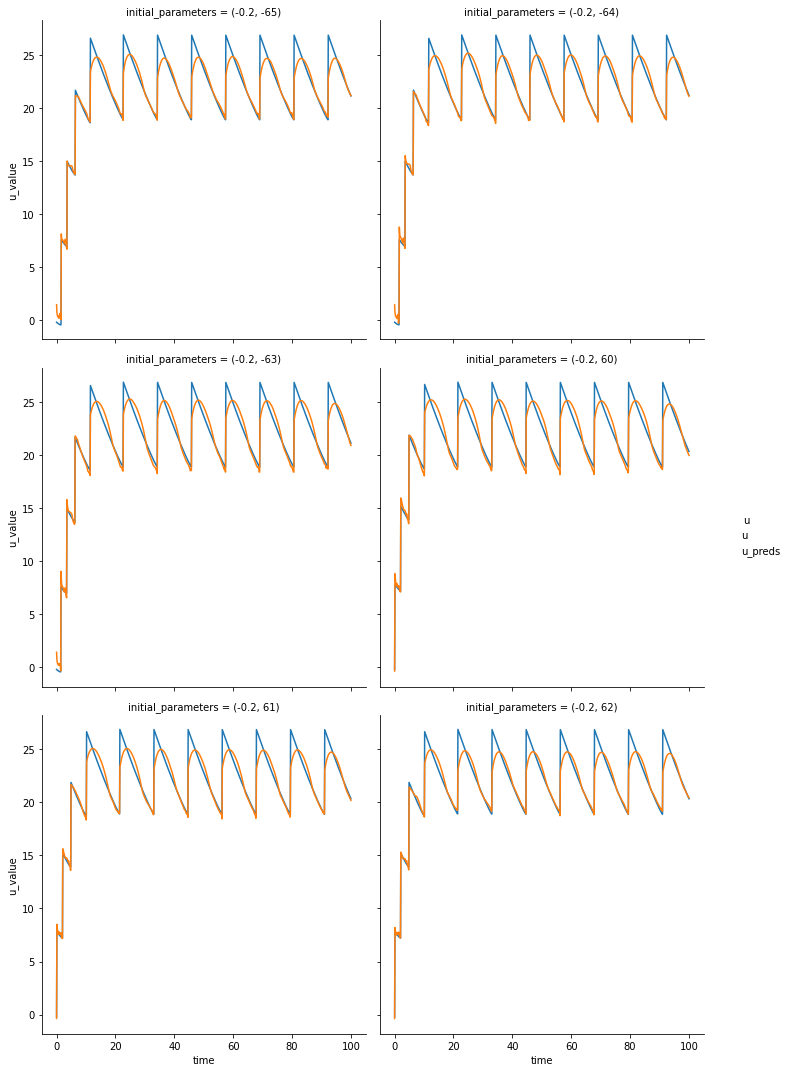

In [21]:
g = sns.FacetGrid(hue(training_and_predictions, ["u"]), col="initial_parameters", height = 5, hue="u", col_wrap=2,)
g.map(plot, "time", "u_value")
g.add_legend()

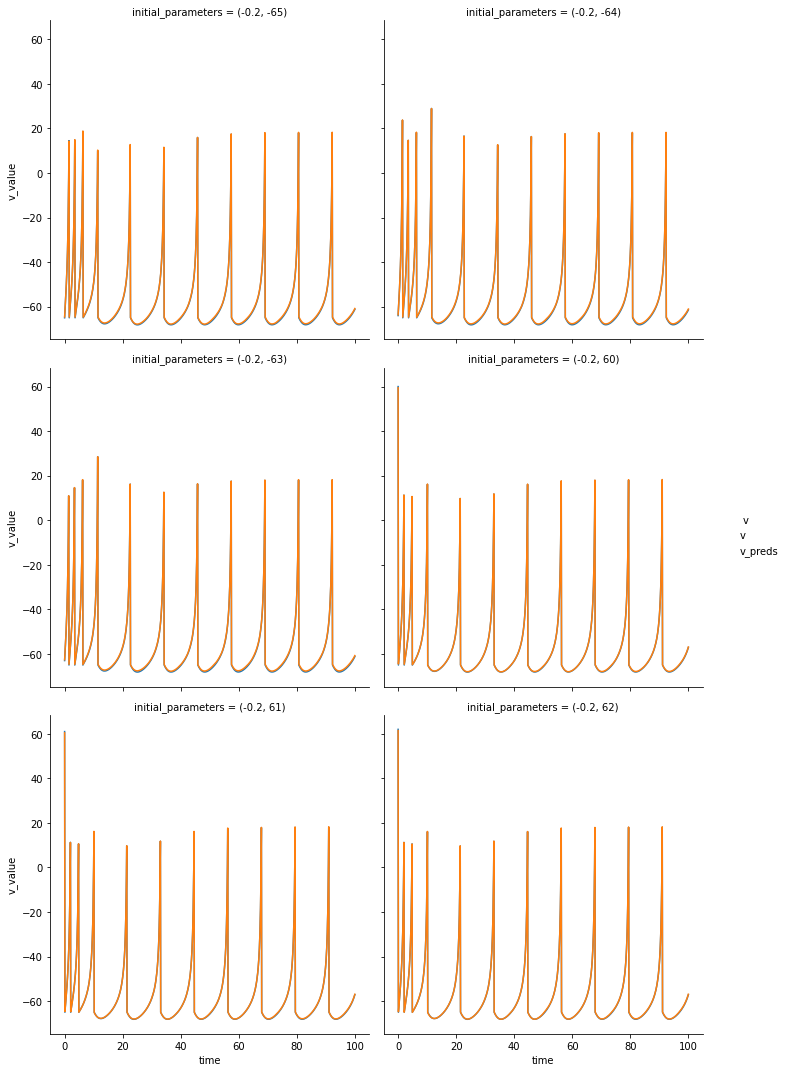

In [22]:
g = sns.FacetGrid(hue(training_and_predictions, ["v"]), col="initial_parameters", height = 5, hue="v", col_wrap=2,)
g.map(plot, "time", "v_value", ci=None)
g.add_legend()

## Testing : Simulations

In [23]:
testing = pd.DataFrame(data = pd.read_csv("../../data/test/spiking_neurons.csv"))

In [24]:
testing.head()

,time,initial_v,initial_u,u,v
0,0.0,-0.21,59.501,-0.210000,59.501000
1,0.1,-0.21,59.501,7.814220,-65.000000
2,0.2,-0.21,59.501,7.772592,-63.381422
3,0.3,-0.21,59.501,7.731694,-61.780574
4,0.4,-0.21,59.501,7.691519,-60.176673


In [25]:
testing["initial_parameters"] = list(zip(testing.initial_u, testing.initial_v))
testing.head()

,time,initial_v,initial_u,u,v,initial_parameters
0,0.0,-0.21,59.501,-0.210000,59.501000,"(59.501000000000005, -0.21)"
1,0.1,-0.21,59.501,7.814220,-65.000000,"(59.501000000000005, -0.21)"
2,0.2,-0.21,59.501,7.772592,-63.381422,"(59.501000000000005, -0.21)"
3,0.3,-0.21,59.501,7.731694,-61.780574,"(59.501000000000005, -0.21)"
4,0.4,-0.21,59.501,7.691519,-60.176673,"(59.501000000000005, -0.21)"


In [26]:
len(testing)

7007

## Testing : Predictions

In [27]:
def testing_preds(test_df):
    inputs = torch.tensor(test_df.iloc[ :, [0,1,2,4]].values)
    targets = torch.tensor(test_df.iloc[:, [3,4]].values)
    preds, _ = predictions(num_inputs=4, num_classes=2, learning_rate=0.0005, batch_size=1, num_epochs=1, inputs=inputs.float(), targets=targets.float(), train=False, path= "../../data/state/spiking_neurons.pth")
    data = {'time' : test_df.time.values,
            'initial_parameters' : test_df.initial_parameters.values,
            'u' : tensor_flatten(preds[:,0]), 'v' : tensor_flatten(preds[:, 1])}
    return pd.DataFrame(data = data, columns = ["time", "u", "v", "initial_parameters",]);

In [28]:
testing_preds = testing_preds(testing)

In [29]:
len(testing_preds)

7007

In [30]:
testing_preds.head()

,time,u,v,initial_parameters
0,0.0,-0.342362,58.977528,"(59.501000000000005, -0.21)"
1,0.1,8.998909,-64.449135,"(59.501000000000005, -0.21)"
2,0.2,8.621891,-63.079979,"(59.501000000000005, -0.21)"
3,0.3,8.311334,-61.692200,"(59.501000000000005, -0.21)"
4,0.4,8.119730,-60.191574,"(59.501000000000005, -0.21)"


In [31]:
testing_preds = testing_preds.rename(columns={"u" : "u_preds", "v" : "v_preds"})

In [32]:
testing_preds.head()

,time,u_preds,v_preds,initial_parameters
0,0.0,-0.342362,58.977528,"(59.501000000000005, -0.21)"
1,0.1,8.998909,-64.449135,"(59.501000000000005, -0.21)"
2,0.2,8.621891,-63.079979,"(59.501000000000005, -0.21)"
3,0.3,8.311334,-61.692200,"(59.501000000000005, -0.21)"
4,0.4,8.119730,-60.191574,"(59.501000000000005, -0.21)"


In [33]:
testing_and_predictions = pd.merge(testing, testing_preds, right_on=["time", "initial_parameters"], left_on=["time", "initial_parameters"])

In [34]:
testing_and_predictions.head()

,time,initial_v,initial_u,u,v,initial_parameters,u_preds,v_preds
0,0.0,-0.21,59.501,-0.210000,59.501000,"(59.501000000000005, -0.21)",-0.342362,58.977528
1,0.1,-0.21,59.501,7.814220,-65.000000,"(59.501000000000005, -0.21)",8.998909,-64.449135
2,0.2,-0.21,59.501,7.772592,-63.381422,"(59.501000000000005, -0.21)",8.621891,-63.079979
3,0.3,-0.21,59.501,7.731694,-61.780574,"(59.501000000000005, -0.21)",8.311334,-61.692200
4,0.4,-0.21,59.501,7.691519,-60.176673,"(59.501000000000005, -0.21)",8.119730,-60.191574


### Graphs

In [35]:
def hue(df, hue):
    for var in hue:
        columns = list(df.columns)
        columns.remove(var)
        columns.remove("{}_{}".format(var,"preds"))
        df = df.melt(columns, var_name=var, value_name = f"{var}value")
    return df

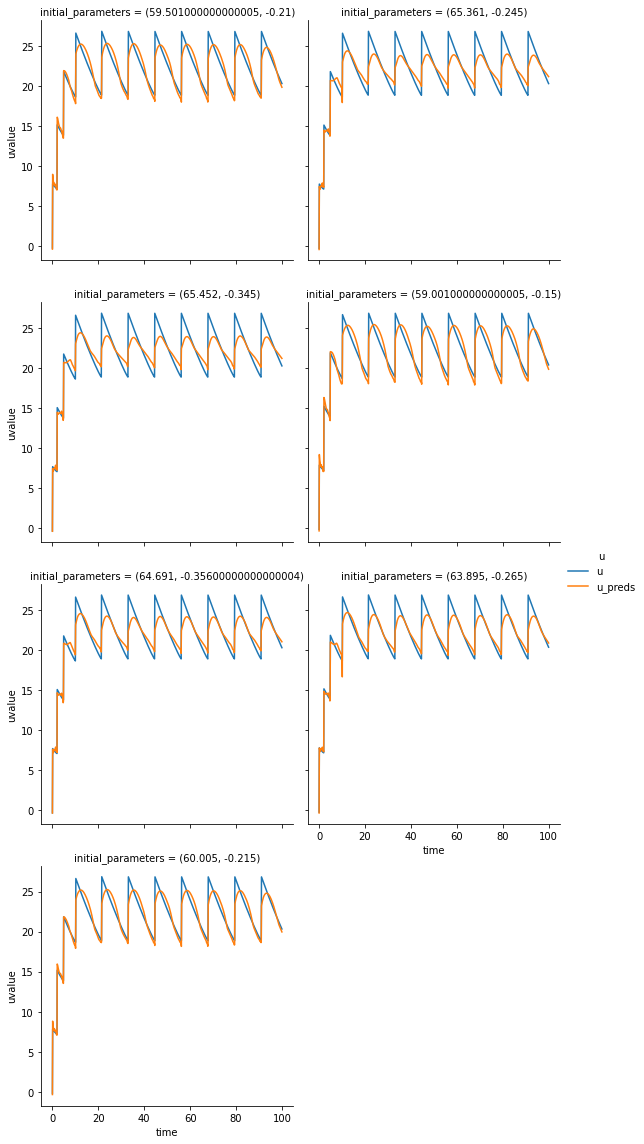

In [36]:
g = sns.FacetGrid(hue(testing_and_predictions, ["u"]), col_wrap=2, height = 4, col="initial_parameters", hue="u")
g.map(sns.lineplot, "time", "uvalue", ci=None)
g.add_legend()

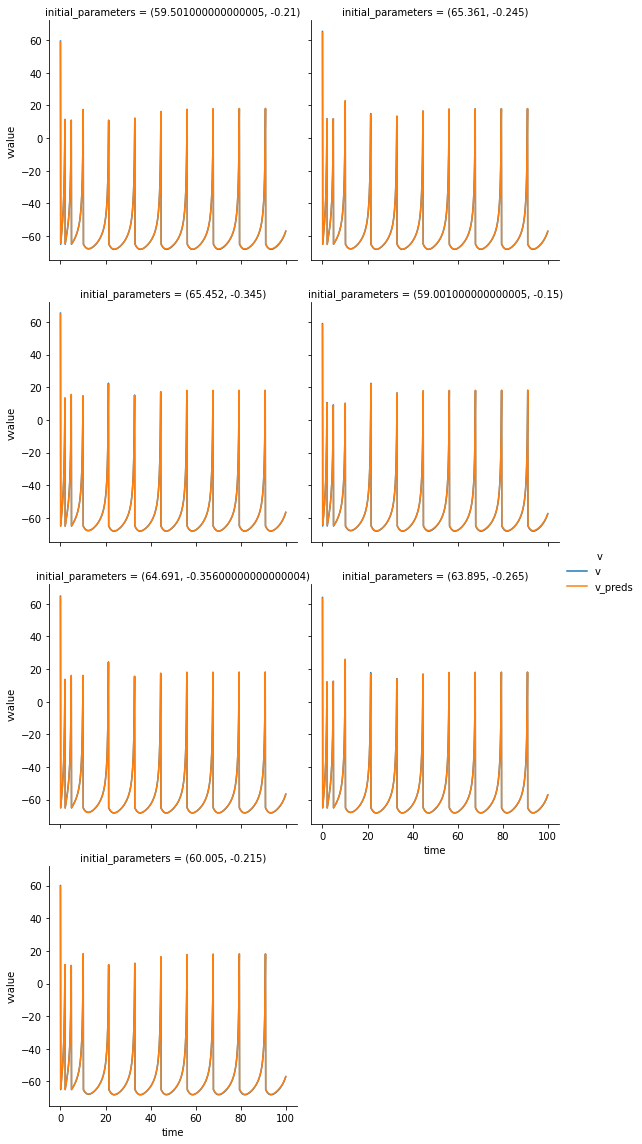

In [37]:
g = sns.FacetGrid(hue(testing_and_predictions, ["v"]), col_wrap=2, height = 4, col="initial_parameters", hue="v")
g.map(sns.lineplot, "time", "vvalue", ci=None)
g.add_legend()

### Loss by simulation

In [38]:
testing.head()

,time,initial_v,initial_u,u,v,initial_parameters
0,0.0,-0.21,59.501,-0.210000,59.501000,"(59.501000000000005, -0.21)"
1,0.1,-0.21,59.501,7.814220,-65.000000,"(59.501000000000005, -0.21)"
2,0.2,-0.21,59.501,7.772592,-63.381422,"(59.501000000000005, -0.21)"
3,0.3,-0.21,59.501,7.731694,-61.780574,"(59.501000000000005, -0.21)"
4,0.4,-0.21,59.501,7.691519,-60.176673,"(59.501000000000005, -0.21)"


In [39]:
testing_cpy = testing.copy()

In [40]:
testing_cpy = testing_cpy.drop(columns=["initial_u","initial_v"])

In [41]:
testing_cpy.head()

,time,u,v,initial_parameters
0,0.0,-0.210000,59.501000,"(59.501000000000005, -0.21)"
1,0.1,7.814220,-65.000000,"(59.501000000000005, -0.21)"
2,0.2,7.772592,-63.381422,"(59.501000000000005, -0.21)"
3,0.3,7.731694,-61.780574,"(59.501000000000005, -0.21)"
4,0.4,7.691519,-60.176673,"(59.501000000000005, -0.21)"


In [42]:
testing_preds.head()

,time,u_preds,v_preds,initial_parameters
0,0.0,-0.342362,58.977528,"(59.501000000000005, -0.21)"
1,0.1,8.998909,-64.449135,"(59.501000000000005, -0.21)"
2,0.2,8.621891,-63.079979,"(59.501000000000005, -0.21)"
3,0.3,8.311334,-61.692200,"(59.501000000000005, -0.21)"
4,0.4,8.119730,-60.191574,"(59.501000000000005, -0.21)"


In [43]:
simulationLoss, _ = lossBySimulations(testing_cpy, testing_preds, [1,2])

In [44]:
simulationLoss.head()

,initial_parameters,Loss
0,59.001000000000005 -0.15,0.505003
1,59.501000000000005 -0.21,0.462706
2,60.005 -0.215,0.433382
3,63.895 -0.265,0.641406
4,64.691 -0.35600000000000004,0.764432


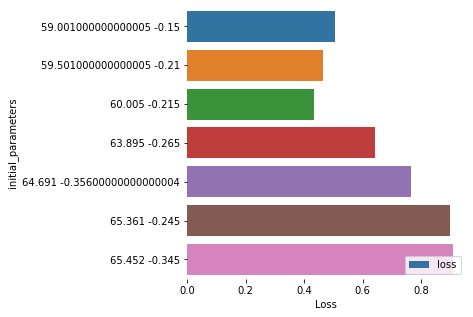

In [45]:
simulaPlots("Loss", "initial_parameters", simulationLoss, figsize = (5,5))

In [46]:
timeLoss, _ = lossByTime(testing_cpy, testing_preds, [1,2])

In [47]:
timeLoss.head()

,Time,initial_parameters,Loss
0,0.0,"(59.001000000000005, -0.15)",0.168405
1,0.1,"(59.001000000000005, -0.15)",1.086266
2,0.2,"(59.001000000000005, -0.15)",0.535920
3,0.3,"(59.001000000000005, -0.15)",0.236730
4,0.4,"(59.001000000000005, -0.15)",0.113943


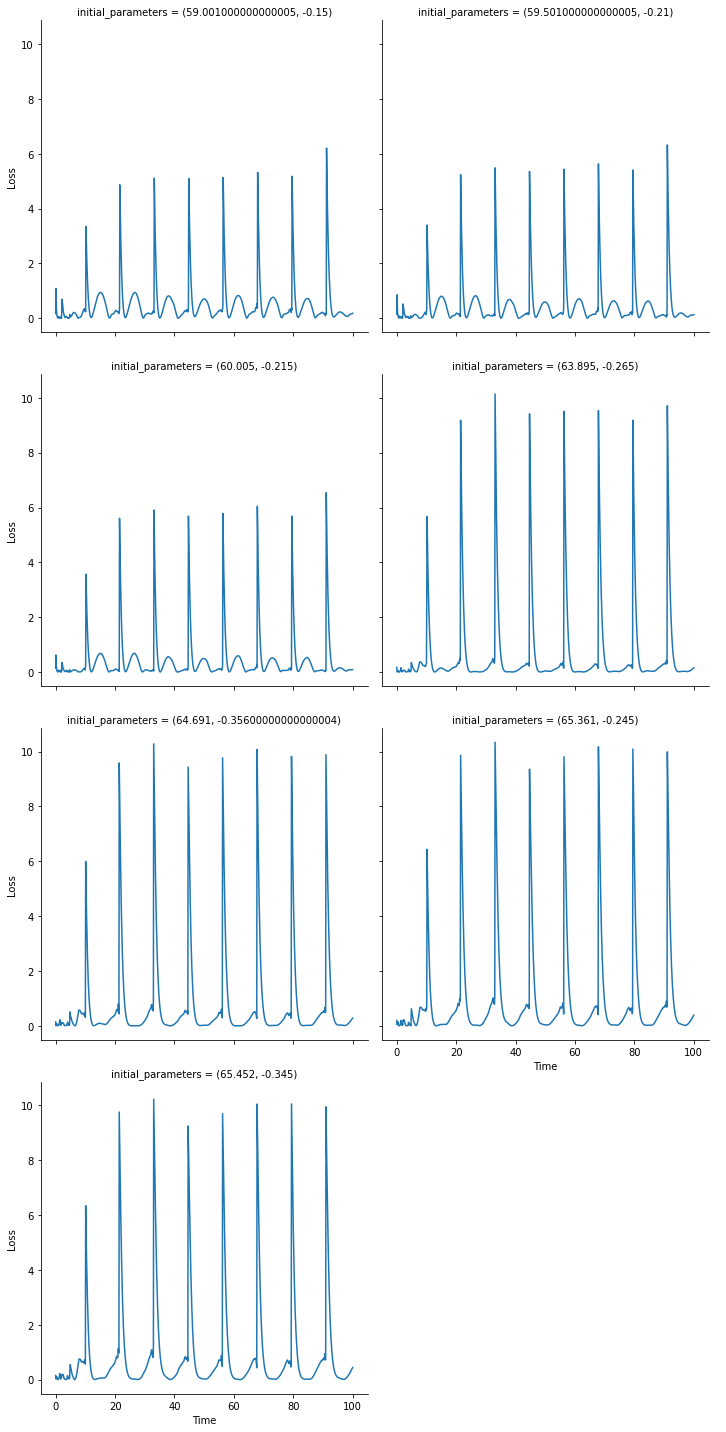

In [48]:
g = sns.FacetGrid(data = timeLoss, col = "initial_parameters", height = 5, col_wrap=2)
g.map(sns.lineplot, "Time", "Loss", ci=None)
g.add_legend()